## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.494822  0.018213 -0.490010 -1.163143  1.093355 -1.346105
1 -1.625025 -0.421715  0.102224 -0.071627  0.102626 -1.315393
2  0.677297  1.411832  0.607952 -1.608454 -0.725686 -0.881937
3  0.835701 -1.564439  1.744495 -0.722961 -0.698108 -1.420079
4  0.802321 -1.571158  1.556392 -1.628713  1.636603 -1.510246


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9179921	total: 57.4ms	remaining: 57.4s
1:	learn: 0.9101902	total: 58ms	remaining: 29s
2:	learn: 0.9024795	total: 58.4ms	remaining: 19.4s
3:	learn: 0.8938065	total: 58.9ms	remaining: 14.7s
4:	learn: 0.8868256	total: 59.5ms	remaining: 11.8s
5:	learn: 0.8784443	total: 60.1ms	remaining: 9.96s
6:	learn: 0.8688394	total: 60.7ms	remaining: 8.61s
7:	learn: 0.8602032	total: 61.2ms	remaining: 7.59s
8:	learn: 0.8534615	total: 61.7ms	remaining: 6.79s
9:	learn: 0.8465251	total: 62.2ms	remaining: 6.16s
10:	learn: 0.8386006	total: 62.8ms	remaining: 5.65s
11:	learn: 0.8310013	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8232309	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8164583	total: 64.3ms	remaining: 4.53s
14:	learn: 0.8112784	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8046304	total: 65.3ms	remaining: 4.02s
16:	learn: 0.7987961	total: 65.8ms	remaining: 3.81s
17:	learn: 0.7905563	total: 66.3ms	remaining: 3.62s
18:	learn: 0.7835403	total: 66.8ms	remaining: 3.

100:	learn: 0.4119676	total: 107ms	remaining: 949ms
101:	learn: 0.4085378	total: 107ms	remaining: 945ms
102:	learn: 0.4060103	total: 108ms	remaining: 939ms
103:	learn: 0.4033821	total: 108ms	remaining: 933ms
104:	learn: 0.4009634	total: 109ms	remaining: 927ms
105:	learn: 0.3972333	total: 109ms	remaining: 921ms
106:	learn: 0.3944687	total: 110ms	remaining: 914ms
107:	learn: 0.3924266	total: 110ms	remaining: 908ms
108:	learn: 0.3895305	total: 110ms	remaining: 902ms
109:	learn: 0.3870053	total: 111ms	remaining: 897ms
110:	learn: 0.3840779	total: 111ms	remaining: 891ms
111:	learn: 0.3815960	total: 112ms	remaining: 886ms
112:	learn: 0.3794683	total: 112ms	remaining: 882ms
113:	learn: 0.3768301	total: 113ms	remaining: 877ms
114:	learn: 0.3744988	total: 113ms	remaining: 872ms
115:	learn: 0.3726126	total: 114ms	remaining: 867ms
116:	learn: 0.3706934	total: 114ms	remaining: 862ms
117:	learn: 0.3678363	total: 115ms	remaining: 857ms
118:	learn: 0.3654583	total: 115ms	remaining: 851ms
119:	learn: 

265:	learn: 0.1582276	total: 186ms	remaining: 514ms
266:	learn: 0.1574777	total: 187ms	remaining: 513ms
267:	learn: 0.1569948	total: 187ms	remaining: 512ms
268:	learn: 0.1564373	total: 188ms	remaining: 510ms
269:	learn: 0.1556303	total: 188ms	remaining: 509ms
270:	learn: 0.1552296	total: 189ms	remaining: 508ms
271:	learn: 0.1542250	total: 189ms	remaining: 506ms
272:	learn: 0.1532344	total: 190ms	remaining: 505ms
273:	learn: 0.1524271	total: 190ms	remaining: 504ms
274:	learn: 0.1515559	total: 191ms	remaining: 502ms
275:	learn: 0.1506379	total: 191ms	remaining: 501ms
276:	learn: 0.1498357	total: 191ms	remaining: 500ms
277:	learn: 0.1493408	total: 192ms	remaining: 498ms
278:	learn: 0.1486785	total: 192ms	remaining: 497ms
279:	learn: 0.1480144	total: 193ms	remaining: 496ms
280:	learn: 0.1472679	total: 193ms	remaining: 495ms
281:	learn: 0.1469098	total: 194ms	remaining: 493ms
282:	learn: 0.1461556	total: 194ms	remaining: 492ms
283:	learn: 0.1451714	total: 195ms	remaining: 491ms
284:	learn: 

447:	learn: 0.0730076	total: 273ms	remaining: 337ms
448:	learn: 0.0725572	total: 274ms	remaining: 336ms
449:	learn: 0.0722873	total: 275ms	remaining: 336ms
450:	learn: 0.0719066	total: 275ms	remaining: 335ms
451:	learn: 0.0716782	total: 275ms	remaining: 334ms
452:	learn: 0.0712459	total: 276ms	remaining: 333ms
453:	learn: 0.0708927	total: 276ms	remaining: 332ms
454:	learn: 0.0705703	total: 277ms	remaining: 331ms
455:	learn: 0.0703511	total: 277ms	remaining: 331ms
456:	learn: 0.0701363	total: 278ms	remaining: 330ms
457:	learn: 0.0699260	total: 278ms	remaining: 329ms
458:	learn: 0.0695392	total: 279ms	remaining: 329ms
459:	learn: 0.0692052	total: 279ms	remaining: 328ms
460:	learn: 0.0688952	total: 280ms	remaining: 327ms
461:	learn: 0.0685949	total: 280ms	remaining: 326ms
462:	learn: 0.0683101	total: 281ms	remaining: 326ms
463:	learn: 0.0680220	total: 281ms	remaining: 325ms
464:	learn: 0.0676408	total: 282ms	remaining: 324ms
465:	learn: 0.0672614	total: 282ms	remaining: 323ms
466:	learn: 

611:	learn: 0.0326518	total: 353ms	remaining: 224ms
612:	learn: 0.0325388	total: 354ms	remaining: 223ms
613:	learn: 0.0323935	total: 355ms	remaining: 223ms
614:	learn: 0.0321876	total: 355ms	remaining: 222ms
615:	learn: 0.0320598	total: 356ms	remaining: 222ms
616:	learn: 0.0319337	total: 356ms	remaining: 221ms
617:	learn: 0.0317859	total: 356ms	remaining: 220ms
618:	learn: 0.0316775	total: 357ms	remaining: 220ms
619:	learn: 0.0314883	total: 358ms	remaining: 219ms
620:	learn: 0.0313501	total: 358ms	remaining: 218ms
621:	learn: 0.0311611	total: 358ms	remaining: 218ms
622:	learn: 0.0309909	total: 359ms	remaining: 217ms
623:	learn: 0.0308066	total: 359ms	remaining: 217ms
624:	learn: 0.0306781	total: 360ms	remaining: 216ms
625:	learn: 0.0304986	total: 360ms	remaining: 215ms
626:	learn: 0.0303158	total: 361ms	remaining: 215ms
627:	learn: 0.0302498	total: 361ms	remaining: 214ms
628:	learn: 0.0301408	total: 362ms	remaining: 213ms
629:	learn: 0.0299622	total: 362ms	remaining: 213ms
630:	learn: 

830:	learn: 0.0127755	total: 457ms	remaining: 93ms
831:	learn: 0.0127348	total: 458ms	remaining: 92.4ms
832:	learn: 0.0126947	total: 458ms	remaining: 91.9ms
833:	learn: 0.0126538	total: 459ms	remaining: 91.3ms
834:	learn: 0.0126136	total: 459ms	remaining: 90.7ms
835:	learn: 0.0125614	total: 459ms	remaining: 90.1ms
836:	learn: 0.0124954	total: 460ms	remaining: 89.6ms
837:	learn: 0.0124565	total: 460ms	remaining: 89ms
838:	learn: 0.0124182	total: 461ms	remaining: 88.4ms
839:	learn: 0.0123792	total: 461ms	remaining: 87.8ms
840:	learn: 0.0123282	total: 462ms	remaining: 87.3ms
841:	learn: 0.0122636	total: 462ms	remaining: 86.8ms
842:	learn: 0.0121870	total: 463ms	remaining: 86.2ms
843:	learn: 0.0121270	total: 463ms	remaining: 85.6ms
844:	learn: 0.0120574	total: 464ms	remaining: 85ms
845:	learn: 0.0119895	total: 464ms	remaining: 84.5ms
846:	learn: 0.0119232	total: 465ms	remaining: 83.9ms
847:	learn: 0.0118643	total: 465ms	remaining: 83.3ms
848:	learn: 0.0118080	total: 465ms	remaining: 82.8ms

989:	learn: 0.0068762	total: 536ms	remaining: 5.42ms
990:	learn: 0.0068472	total: 537ms	remaining: 4.88ms
991:	learn: 0.0068396	total: 538ms	remaining: 4.33ms
992:	learn: 0.0068321	total: 538ms	remaining: 3.79ms
993:	learn: 0.0068247	total: 539ms	remaining: 3.25ms
994:	learn: 0.0067976	total: 539ms	remaining: 2.71ms
995:	learn: 0.0067651	total: 540ms	remaining: 2.17ms
996:	learn: 0.0067410	total: 540ms	remaining: 1.63ms
997:	learn: 0.0067091	total: 541ms	remaining: 1.08ms
998:	learn: 0.0067017	total: 541ms	remaining: 541us
999:	learn: 0.0066703	total: 542ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

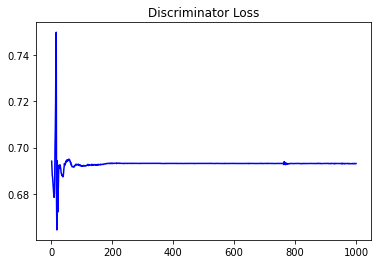

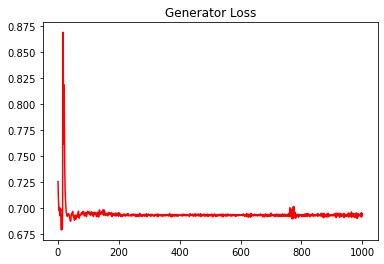

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.18919921129269895


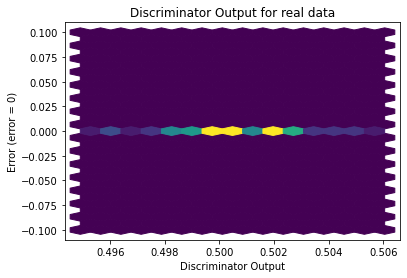

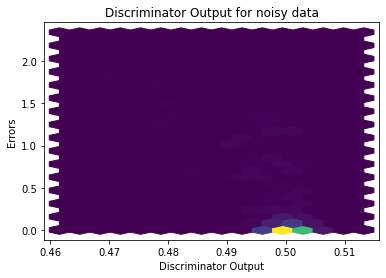

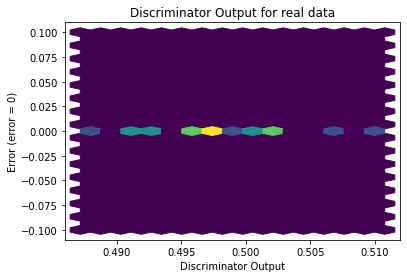

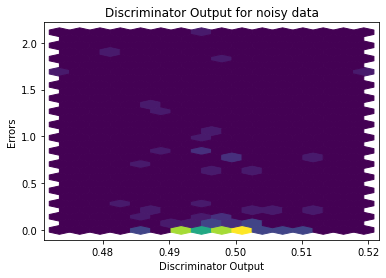

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


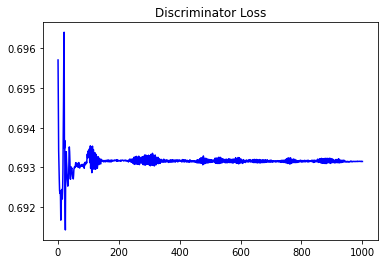

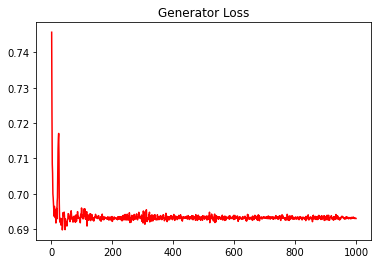

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.23627539987500878


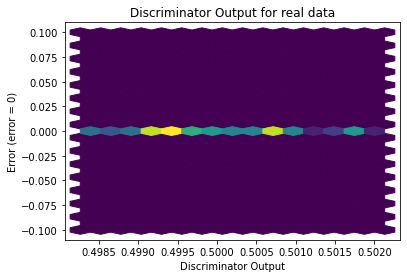

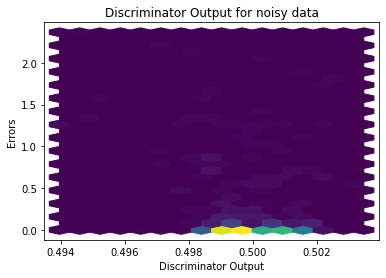

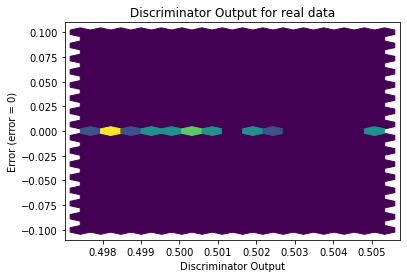

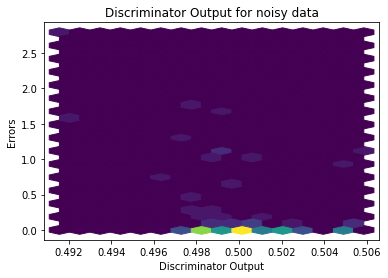

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1090]], requires_grad=True)
